In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [54]:
X, y = pd.DataFrame(iris['data'], columns=iris['feature_names']), pd.DataFrame(iris['target'], columns=['type'])

In [55]:
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## LDA

In [31]:
model = lda().fit(sm.add_constant(X), y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
pred_y = model.predict(sm.add_constant(X))

In [33]:
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [34]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



1.0
0.8294
0.9783999999999999


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


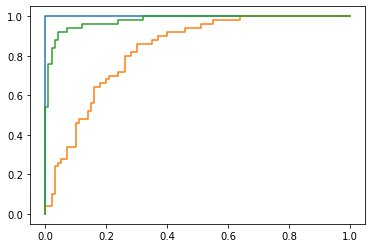

In [49]:
from sklearn.preprocessing import label_binarize
y_vec = label_binarize(y, [0, 1, 2])

for i in range(3):
    model = lda().fit(X, y_vec[:, i])
    fpr, tpr, thr = roc_curve(y_vec[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr, tpr)
    print(auc(fpr, tpr))
plt.show()

## QDA

In [61]:
model = qda().fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [62]:
pred_y = model.predict(X)

In [63]:
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [64]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



1.0
0.9988
0.9962


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


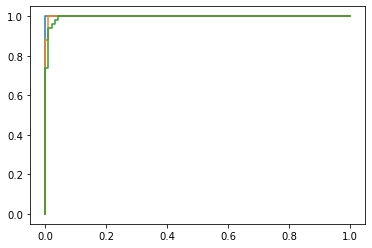

In [70]:
y_vec = label_binarize(y, [0, 1, 2])
for i in range(3):
    model = qda().fit(X, y_vec[:,i])
    pred_y = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y_vec[:,i], pred_y)
    plt.plot(fpr, tpr)
    print(auc(fpr, tpr))
plt.show()

In [ ]:
'''
아아리스 데이터에 대해 QDA가 LDA보다 성능이 좋았다.
즉 데이터가 충분해서 공분산 전제를 적용하는 것보다 직접 가능도를 계산하는 QDA가 적합하다.
'''